In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw3.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 3: Preprocessing 
### Associated lectures: [Lectures 4, 5, 6](https://github.com/UBC-CS/cpsc330-2023W1/tree/main/lectures) 

**Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html).**

## Imports 

In [2]:
from hashlib import sha1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Submission instructions
<hr>
rubric={points:6}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023W1/blob/main/docs/homework_instructions.md). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 4. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file. 
5. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb.



_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

## Introduction <a name="in"></a>
<hr>

A crucial step when using machine learning algorithms on real-world datasets is preprocessing. This homework will give you some practice of data preprocessing and building a supervised machine learning pipeline on a real-world dataset. 

<br><br>

## Exercise 1: Introducing the dataset
<hr>

In this lab, you will be working on [the adult census dataset](https://www.kaggle.com/uciml/adult-census-income#). Download the CSV and save it as `adult.csv` under the data folder in this homework folder. 

This is a classification dataset and the classification task is to predict whether income exceeds 50K per year or not based on the census data. You can find more information on the dataset and features [here](http://archive.ics.uci.edu/ml/datasets/Adult).

The starter code below loads the data CSV (assuming that it is saved as `adult.csv` under the data folder). 

_Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

In [3]:
census_df = pd.read_csv("data/adult.csv")
census_df.shape

(32561, 15)

<br><br>

### 1.1 Data splitting 
rubric={autograde:2}

To prevent any violation of the golden rule, the initial step before proceeding with any task is to split the data.

**Your tasks:**

1. Split the data into `train_df` (40%) and `test_df` (60%) with `random_state = 123`. Keep the target column (`income`) in the splits so that we can use it in the exploratory data analysis.  

_Usually having more data for training is a good idea. But here I'm using 40%/60% split because running cross-validation with this dataset can take a while on a modest laptop. A smaller training data means it won't take too long to train the model on your laptop. A side advantage of this would be that with a bigger test split, we'll have a more reliable estimate of the model performance!_

In [4]:
census_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 2

In [5]:
train_df, test_df = train_test_split(census_df, test_size=0.60, random_state=123)

#train_df = None
#test_df = None


In [6]:
grader.check("q1.1")

q1.1 results: All test cases passed!

<br><br>

## Exercise 2: Exploratory data analysis (EDA) <a name="2"></a> 
<hr>

Let's examine our `train_df`. 

In [7]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


We see some missing values represented with a "?". Probably these were the questions not answered by some people during the census.  Usually `.describe()` or `.info()` methods would give you information on missing values. But here, they won't pick "?" as missing values because they are encoded as strings instead of an actual NaN in Python. So let's replace them with `np.nan` before we carry out EDA. If you do not do it, you'll encounter an error later on when you try to pass this data to a classifier. 

In [8]:
train_df = train_df.replace("?", np.nan)
test_df = test_df.replace("?", np.nan)
train_df.shape

(13024, 15)

In [9]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


The "?" symbols are now replaced with NaN values. 

<br><br>

### 2.1 `describe()` method
rubric={autograde:5}

**Your tasks:**

1. Examine the output of `train_df.describe()` with `include='all'` argument and store it in a variable called `census_summary`.
2. What is the highest hours per week someone reported? Store it in a variable called `max_hours_per_week`.
3. What is the most frequently occurring occupation in this dataset? Store it in a variable called `most_freq_occupation`.
4. Store the column names of the columns with missing values as a list in a variable called `missing_vals_cols`. 
5. Store the column names of all numeric-looking columns as a list in a variable called `numeric_cols`.  

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 5

In [10]:
census_summary = train_df.describe(include='all')

In [11]:
max_hours_per_week = train_df['hours.per.week'].max()
max_hours_per_week

99

In [12]:
type(max_hours_per_week)

numpy.int64

In [13]:
most_freq_occupation = train_df['occupation'].mode()
most_freq_occupation = 'Prof-specialty'
most_freq_occupation


'Prof-specialty'

In [14]:
missing_values = train_df.isnull()
missing_counts = missing_values.sum()


In [15]:
missing_vals_cols = missing_counts[missing_counts>0].index.tolist()
numeric_cols = train_df.select_dtypes(include=['int', 'float']).columns.tolist()
missing_vals_cols


['workclass', 'occupation', 'native.country']

In [16]:
# Sorting the lists for the autograder
missing_vals_cols.sort()
numeric_cols.sort()

In [17]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 2.2 Visualizing features
rubric={points:5}

**Your tasks:**

1. For each numeric feature in `numeric_cols` you identified above, visualize the histograms for <=50K and >50K classes. 
2. Write a sentence or two describing your observations. 

> You can use the library of your choice for visualization. 

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 5

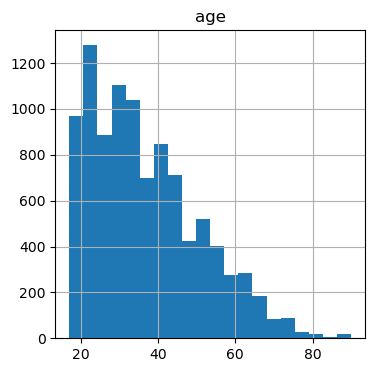

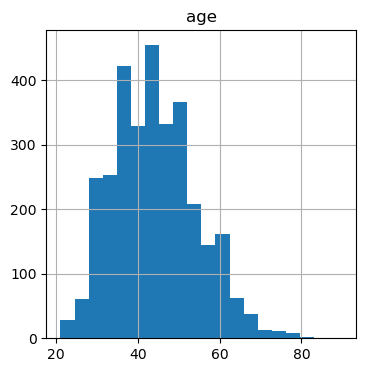

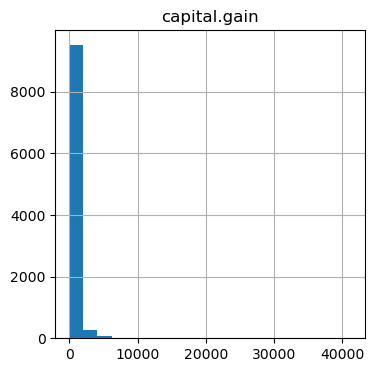

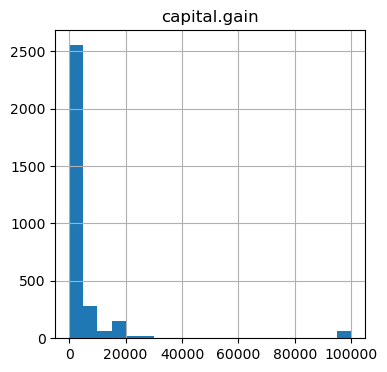

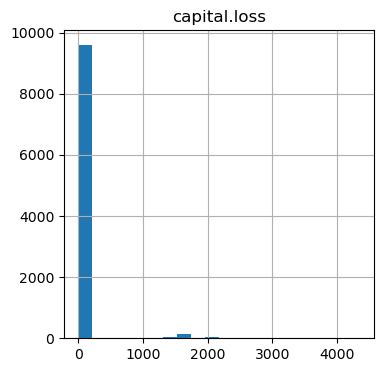

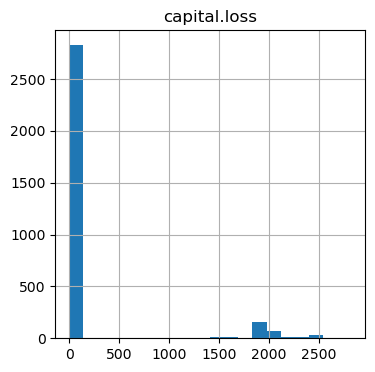

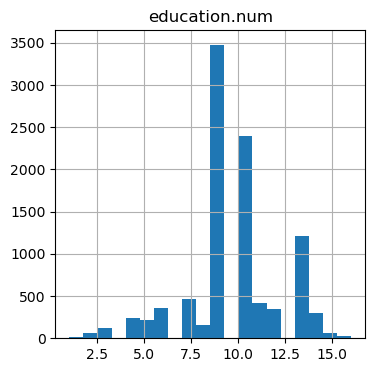

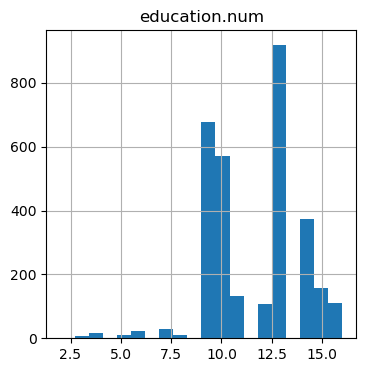

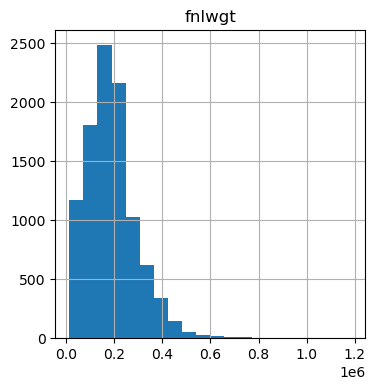

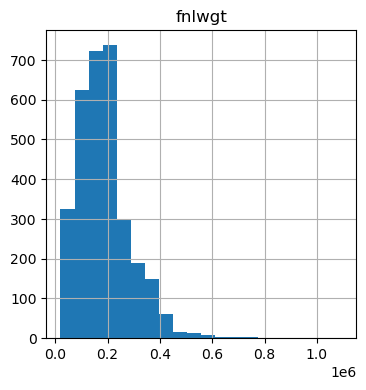

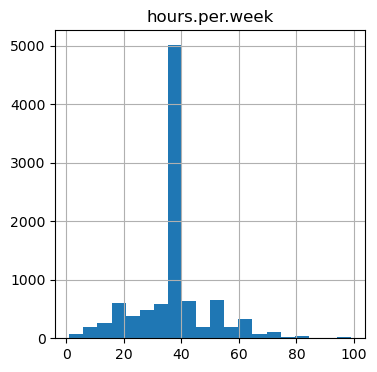

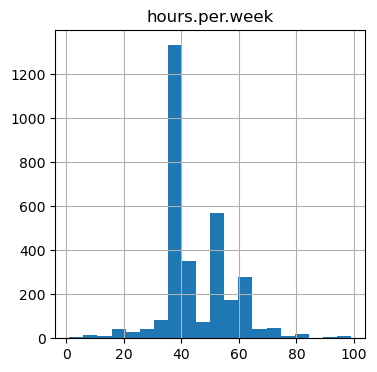

In [18]:
low_inc = train_df[train_df['income']== '<=50K']
high_inc = train_df[train_df['income']=='>50K']

for col in numeric_cols:
    low_hist = low_inc.hist(column=col, bins=20, figsize=(4, 4))
    high_hist = high_inc.hist(column=col, bins=20, figsize=(4, 4))

When it comes to age, most of the lower income class are younger (<40), the higher income class are older (>40). Both classes have similar capital gains and losses. The higher income class is more educated, and the fnlwgt is similar between both classes. The higher income classes works slight more hours per week

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 2.3 Identify transformations to apply
rubric={points:13}

Before passing this data to a machine learning model, we need to apply some transformations on different features. Below we are providing possible transformations which can be applied on each column in `census_df`.  

**Your tasks:**
1. Write your justification or explanation for each row in the explanation column. An example explanation is given for the age column. 

> Note: This question is a bit open-ended. If you do not agree with the provided transformation, feel free to argue your case in the explanation. That said, in this assignment, go with the transformations provided below. 

<div class="alert alert-warning">

Solution_2.3
    
</div>

| Feature | Transformation | Explanation
| --- | ----------- | ----- |
| age | scaling |  A numeric feature with no missing values. It will be a good idea to apply scaling, as the range of values (17 to 90) is quite different compared to other numeric features.|
| workclass | imputation, one-hot encoding | |
| fnlwgt | drop |  |
| education | ordinal encoding | |
| education.num | drop | |
| marital.status | one-hot encoding  | |
| occupation | imputation, one-hot encoding  | |
| relationship | one-hot encoding  | |
| race | drop  |  |
| sex | one-hot encoding with "binary=True" | |
| capital.gain | scaling |  | 
| capital.loss | scaling |  |
| hours.per.week | scaling | |
| native.country | imputation, one-hot encoding | | 


_Points:_ 13

| Feature | Transformation | Explanation
| --- | ----------- | ----- |
| age | scaling |  A numeric feature with no missing values. It will be a good idea to apply scaling, as the range of values (17 to 90) is quite different compared to other numeric features.|
| workclass | imputation, one-hot encoding | there are missing values so imputation is needed, one hot encoding because data is not numerical.|
| fnlwgt | drop | the final weight is not relevant, so the data is dropped. |
| education | ordinal encoding | education is ordinal because there is a natural ranking/progression in the catergories (university follows high school, etc) |
| education.num | drop | the education number is not relevant, so the feature is dropped  |
| marital.status | one-hot encoding  | marital status is not numerical, so it must be one-hot encoded |
| occupation | imputation, one-hot encoding  | there are missing values in this column so imputation is needed, one hot coding is needed because the data is not numerical |
| relationship | one-hot encoding  |one hot coding is needed because the data is not numerical |
| race | drop  | race is not a relevant feature so the column is dropped |
| sex | one-hot encoding with "binary=True" | there are only two distinct values in this column, so binary encoding is appropriate, one hot encoding because the data is not numerical |
| capital.gain | scaling | there are no missing values, and scaling is appropriate because the data is numerical and the range of values is very different from each other  | 
| capital.loss | scaling | there are no missing values, and scaling is appropriate because the data is numerical and the range of values is very different from each other  |
| hours.per.week | scaling |there are no missing values, and scaling is appropriate because the data is numerical and the range of values is very different from each other  |
| native.country | imputation, one-hot encoding |there are missing values in this column so imputation is needed, one hot coding is needed because the data is not numerical |

<!-- END QUESTION -->

<br><br>

### 2.4 Identify feature types 
rubric={autograde:5}


**Your tasks:**
1. Based on the types of transformations you want to apply on the features, identify different feature types and store them in the variables below as lists.  

<div class="alert alert-warning">
    
Solution_2.4
    
</div>

_Points:_ 5

In [19]:
# Fill in the lists below.
numeric_features = ['age', 'hours.per.week', 'capital.gain', 'capital.loss']
categorical_features = ['workclass', 'marital.status', 'occupation', 'relationship', 'native.country'] 
ordinal_features = ['education']
binary_features = [ 'sex']
drop_features = ['fnlwgt', 'education.num', 'race']
target = "income"


In [20]:
# Sorting all the lists above for the autograder
numeric_features.sort()
categorical_features.sort()
ordinal_features.sort()
binary_features.sort()
drop_features.sort()

In [21]:
grader.check("q2.4")

q2.4 results: All test cases passed!

<br><br><br><br>

## Exercise 3: Baseline models 

### 3.1 Separating feature vectors and targets  
rubric={autograde:2}

**Your tasks:**

1. Create `X_train`, `y_train`, `X_test`, `y_test` from `train_df` and `test_df`. 

<div class="alert alert-warning">
    
Solution_3.1
    
</div>

_Points:_ 2

In [22]:
X_train = train_df.drop(columns=['income'])
y_train = train_df['income']
X_test = test_df.drop(columns=['income'])
y_test = test_df['income']

# X_train = None
# y_train = None
# X_test = None
# y_test = None

...

Ellipsis

In [23]:
grader.check("q3.1")

q3.1 results: All test cases passed!

<br><br>

### 3.2 Dummy classifier
rubric={autograde:2}

**Your tasks:**

1. Carry out 5-fold cross-validation using `DummyClassifier` with `strategy="most_frequent"` and `scikit-learn`'s `cross_validate` function with `return_train_scores=True` 
2. Store the results as a dataframe named `dummy_df` where each row corresponds to the results from a cross-validation fold. 

<div class="alert alert-warning">
    
Solution_3.2
    
</div>

_Points:_ 2

In [24]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()

scores = cross_validate(dummy, X_train, y_train, return_train_score=True)

dummy_df = pd.DataFrame(scores)

...

Ellipsis

In [25]:
grader.check("q3.2")

q3.2 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 3.3 Discussion
rubric={points:2}

**Your tasks:**

1. Hopefully, you were able to run cross-validation with dummy classifier successfully in the question above. At this point, if you train [`sklearn`'s `SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model on `X_train` and `y_train` would it work? Why or why not? 

<div class="alert alert-warning">
    
Solution_3.3
    
</div>

_Points:_ 2

_No, we haven't done any preprocessing or transforming on the data yet._

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 4: Column Transformer
<hr>

In this dataset, we have different types of features: numeric features, an ordinal feature, categorical features, and a binary feature. We want to apply different transformations on different columns and therefore we need a column transformer. In this exercise, first, we'll define different transformations on different types of features and then will create a `scikit-learn`'s `ColumnTransformer`. For example, the code below creates a `numeric_transformer` for numeric features. 

In [26]:
numeric_transformer = StandardScaler()

In the exercises below, you'll create transformers for other types of features. 

<br><br>

### 4.1 Preprocessing ordinal features
rubric={autograde:5}

**Your tasks:**

1. Create a transformer called `ordinal_transformer` for our ordinal features. 

> Ordering of some of the education levels is not obvious. Assume that "HS-grad" < "Prof-school" < "Assoc-voc" < "Assoc-acdm" < "Some-college" < "Bachelors"

<div class="alert alert-warning">
    
Solution_4.1
    
</div>

_Points:_ 5

In [27]:
education_levels=[["Preschool","1st-4th","5th-6th","7th-8th","9th","10th","11th","12th","HS-grad","Prof-school","Assoc-voc","Assoc-acdm","Some-college","Bachelors","Masters","Doctorate"]]

ordinal_transformer = OrdinalEncoder(categories=education_levels, dtype=int)
...


Ellipsis

In [28]:
...

Ellipsis

In [29]:
...

Ellipsis

In [30]:
grader.check("q4.1")

q4.1 results: All test cases passed!

<br><br>

### 4.2 Preprocessing binary features
rubric={autograde:2}

**Your tasks:**

1. Create a transformer called `binary_transformer` for our binary features. 

> _Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

<div class="alert alert-warning">
    
Solution_4.2
    
</div>

_Points:_ 2

In [31]:
binary_transformer = OneHotEncoder(drop="if_binary", dtype=int)
...

In [32]:
grader.check("q4.2")

q4.2 results: All test cases passed!

<br><br>

### 4.3 Preprocessing categorical features
rubric={autograde:4}

In Exercises 2.1 and 2.3, we saw that there are 3 categorical features with missing values. So first we need to impute the missing values and then encode these features with one-hot encoding. For the purpose of this assignment, let's just have imputation as the first step for all categorical features even when they do not have missing values. This should be OK because if a feature doesn't have any missing value,  imputation won't be applied. 

If we want to apply more than one transformation on a set of features, we need to create a [`scikit-learn` `Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). For example, for categorical features we can create a `scikit-learn` `Pipeline` with first step as imputation and the second step as one-hot encoding. 

**Your tasks:**

1. Create a `sklearn` `Pipeline` using [`make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) called `categorical_transformer` for our categorical features with two steps: `SimpleImputer` for imputation with `strategy="constant"` and `fill_value="missing"` and `OneHotEncoder` with `handle_unknown="ignore"` for one-hot encoding. 

<div class="alert alert-warning">
    
Solution_4.3
    
</div>

_Points:_ 4

In [33]:
categorical_transformer = make_pipeline(SimpleImputer(strategy="constant", fill_value="missing"),
                                        OneHotEncoder(handle_unknown="ignore", sparse_output=False))

...

Ellipsis

In [34]:
grader.check("q4.3")

q4.3 results: All test cases passed!

<br><br>

### 4.4 Creating a column transformer. 
rubric={autograde:7}

**Your tasks:**
1. Create a `sklearn` `ColumnTransformer` named `preprocessor` using [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) with the transformers defined in the previous exercises. Use the sequence below in the column transformer and add a "drop" step for the `drop_features` in the end.  
    - `numeric_transformer`
    - `ordinal_transformer`
    - `binary_transformer`
    - `categorical_transformer`
2. Transform the data by calling `fit_transform` on the training set and save it as a dataframe in a variable called `transformed_df`. How many new columns have been created in the preprocessed data in comparison to the original `X_train`? Store the difference between the number of columns in `transformed_df` and `X_train` in a variable called `n_new_cols`.

> You are not required to do this but optionally you can try to get column names of the transformed data and create the dataframe `transformed_df` with proper column names. 

<div class="alert alert-warning">
    
Solution_4.4
    
</div>

_Points:_ 7

In [35]:
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (ordinal_transformer, ordinal_features),
    (binary_transformer, binary_features),
    (categorical_transformer, categorical_features),
    ('drop', drop_features)
)

...

Ellipsis

In [36]:
transformed_df = pd.DataFrame(preprocessor.fit_transform(X_train))
print(transformed_df.shape)
print(X_train.shape)
n_new_cols = 70

...

(13024, 84)
(13024, 14)


Ellipsis

In [37]:
grader.check("q4.4")

q4.4 results: All test cases passed!

<br><br><br><br>

## Exercise 5: Building models 

Now that we have preprocessed features, we are ready to build models. Below, I'm providing the function we used in class which returns mean cross-validation score along with standard deviation for a given model. Use it to keep track of your results. 

In [38]:
results_dict = {}  # dictionary to store all the results

In [39]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

Below I'm showing an example where I call `mean_std_cross_val_scores` with `DummyClassifier`. The function calls `cross_validate` with the passed arguments and returns a series with mean cross-validation results and std of cross-validation. When you train new models, you can just add the results of these models in `results_dict`, which can be easily converted to a dataframe so that you can have a table with all your results. 

In [40]:
# Baseline model

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(random_state = 123)
pipe = make_pipeline(preprocessor, dummy)
results_dict["dummy"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True
)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.023 (+/- 0.001),0.009 (+/- 0.001),0.758 (+/- 0.000),0.758 (+/- 0.000)


<br><br>

### 5.1 Trying different classifiers
rubric={autograde:10}

**Your tasks:**

1. For each of the models in the starter code below: 
    - Define a pipeline with two steps: `preprocessor` from 4.4 and the model as your classifier. 
    - Carry out 5-fold cross-validation with the pipeline and get the mean cross-validation scores with std by calling the `mean_std_cross_val_scores` function above. 
    - Store the results in a dataframe called `income_pred_results_df` with the model names in the `models` dictionary below as the index and each row representing results returned by `mean_std_cross_val_scores` function above. In other words, `income_pred_results_df` should look similar to the `results_df` dataframe above with more rows for the models below. 
    
> This might take a while to run. Be patient! 

In [41]:
models = {
    "decision tree": DecisionTreeClassifier(random_state=123),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(random_state=123),
}

<div class="alert alert-warning">
    
Solution_5.1
    
</div>

_Points:_ 10

In [42]:
results_dict = {}

income_pred_results_df = pd.DataFrame()

for model in list(models.keys()): 
    
    pipe = make_pipeline(preprocessor, models[model])
    results_dict[model] = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)

income_pred_results_df = pd.DataFrame(results_dict).T

income_pred_results_df

,fit_time,score_time,test_score,train_score
decision tree,0.080 (+/- 0.005),0.010 (+/- 0.001),0.814 (+/- 0.012),0.987 (+/- 0.001)
kNN,0.030 (+/- 0.004),0.080 (+/- 0.074),0.836 (+/- 0.009),0.883 (+/- 0.003)
RBF SVM,1.525 (+/- 0.076),0.607 (+/- 0.014),0.852 (+/- 0.005),0.855 (+/- 0.002)


In [43]:
...

Ellipsis

In [44]:
grader.check("q5.1")

q5.1 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 5.2 Discussion 
rubric={points:5}

**Your tasks:**

Examine the train and validation accuracies and `fit` and `score` times for all the models in the results above and answer the questions below: 
1. Among the models, which one achieves the highest validation accuracy?
2. Excluding the dummy model, which model exhibits the shortest 'fit' time? Similarly, which model boasts the quickest 'score' time?
3. Among the models, which one shows the highest degree of overfitting and which one exhibits the least overfitting?

<div class="alert alert-warning">
    
Solution_5.2
    
</div>

_Points:_ 5

1. The best valiation accuracy found is the decision tree model, with a 0.987 accuracy in the train score.

2. kNN has the shortest 'fit' time of 0.046 +/- 0.004 seconds, and the decision tree has the shortest 'score' time of 0.015 +/- 0.002 seconds.

3. The decision tree model looks to exhibit the most overfitting, with a crazy-high 0.987 accuracy in the training score. The RBF SVM model probably exhibits the least overfitting, as the train_score is the lowest at 0.855 and an optimizable test_score of 0.852.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 5.3 Hyperparameter optimization
rubric={points:10}

In this exercise, you'll carry out hyperparameter optimization for the hyperparameter `C` of `SVC RBF` classifier. In practice, you'll carry out hyperparameter optimization for all different hyperparameters of the most promising classifiers. For the purpose of this assignment, we'll only do it for the `SVC` classifier with one hyperparameter, namely `C`. 

**Your tasks:**

1. For each `C` value in the `param_grid` below: 
    - Create a pipeline object with two steps: preprocessor from 4.4 and `SVC` classifier with the `C` value.
    - Carry out 5-fold cross validation with the pipeline.  
    - Store the results in `results_dict` and display results as a pandas DataFrame. 
2. Which hyperparameter value seems to be performing the best? Store it in a variable called `best_C`. (Since this question is not autograded, please store the value directly as a number, something like `best_C = 0.001`, if `C = 0.001` is giving you the best CV score.) Is it different than the default value for the hyperparameter used by `scikit-learn`? 

> Note: Running this will take a while. Please be patient. 

In [45]:
param_grid = {"C": np.logspace(-1, 2, 4)}
param_grid

{'C': array([  0.1,   1. ,  10. , 100. ])}

<div class="alert alert-warning">
    
Solution_5.3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [46]:
results_dict = {}

for c in param_grid["C"]:
    pipe = make_pipeline(preprocessor, SVC(C = c, random_state = 123))
    results_dict[c] = cross_val_score(pipe, X_train, y_train, cv = 5)


pd.DataFrame(results_dict).T.mean(axis=1)

    

0.1      0.838298
1.0      0.852350
10.0     0.857571
100.0    0.859567
dtype: float64

In [47]:
...

Ellipsis

In [48]:
best_C = 100.0

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 6: Evaluating on the test set 
<hr>

Now that we have a best performing model, it's time to assess our model on the set aside test set. In this exercise, you'll examine whether the results you obtained using cross-validation on the train set are consistent with the results on the test set. 

### 6.1 Scoring on the unseen test set 
rubric={autograde:4}

**Your tasks:**

1. Create a pipeline named `final_pipeline` with the preprocessor from 4.4 as the first step and the best performing SVC model from 5.3 as the second step (i.e. `C=best_C`). 
2. Train `final_pipeline` on the entire training set `X_train` and `y_train`. 
3. Score `final_pipeline` on `X_test` and `y_test` and store the score in a variable called `test_score`.  

<div class="alert alert-warning">
    
Solution_6.1
    
</div>

_Points:_ 4

_Type your answer here, replacing this text._

In [49]:
final_pipeline = make_pipeline(preprocessor, SVC(C = best_C, random_state = 123))

final_pipeline.fit(X_train, y_train)

test_score = final_pipeline.score(X_test, y_test)



In [50]:
grader.check("q6.1")

q6.1 results: All test cases passed!

<br><br><br><br>

## Exercise 7: Short answer questions

<!-- BEGIN QUESTION -->

### 7.1 kNNs toy example
rubric={points:3}

Suppose you want to get predictions using the $k$-nearest neighbour algorithm on the toy dataset below. 

$$ X = \begin{bmatrix}5 & 2\\4 & -2\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}0\\0\\1\\1\\1\\2\end{bmatrix}.$$

Suppose you are given a new data point $x=\begin{bmatrix} 0 & 0\end{bmatrix}$.  

1. What would the model predict when $k=1$?
2. What would the model predict when $k=3$?
3. What would the model predict when $k=3$ if we were doing regression rather than classification? 

<div class="alert alert-warning">
    
Solution_7.1
    
</div>

_Points:_ 3

Distances: X[sqrt29, sqrt20, sqrt(8), sqrt(200), sqrt(82), sqrt(162)]

1. y = 1. the closest value is x = [2, 2], which results in y = 1
2. y = 0. the closest 3 values are x = [2, 2], [4, -2], and [5, 2], which respective results as y = 0, 0, 1. With more 0s, the prediction will be 0.
3. y = 1/3. the closest values are the same as listed above, with respective results as y = 0, 0, 1. In regression, we take the average of the ys to achieve (0 + 0 + 1)/3 = 1/3.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 7.2 Preprocessing
rubric={points:8}

1. What is the problem with calling `fit_transform` on your test data with `StandardScaler`?
2. Why is it important to follow the Golden Rule? If you violate it, will that give you a worse classifier?
3. What are two advantages of using sklearn Pipelines? 
4. When is it appropriate to use sklearn `ColumnTransformer`? 

<div class="alert alert-warning">
    
Solution_7.2
    
</div>

_Points:_ 8

1. Calling fit_transform on the test data will cause information from the test data to influence the training data, which is a violation of the golden rule
   
2. The Golden Rule states that the test data cannot influence the training data in any way. If you violate it, the results may actually look like they are improved on the surface level, but that's because you're fitting the data on the data you are testing the results on, which is in violation.

3. 1) It's easier to create one pipeline and use on multiple training/testing, reduces repetitiveness in code
   2) Much easier to incorporate cross-validations and hyperparameter tuning into training models


4. The sklearn ColumnTransformer is used when we have multiple different transformations we need to apply on a dataset because they have different column scales. For example, a dataset may have some binary variables, a few numeric, a few categorical, or a few ordinal. The ColumnTransformer makes it easy for the user to transform the variables into a form where supervised machine learning produces good results.

<!-- END QUESTION -->

<br><br><br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.** 



Congratulations on finishing the homework! This was a tricky one but I hope you are feeling good after working on it. You are now ready to build a simple supervised machine learning pipeline on real-world datasets! Well done :clap:! 

![](img/eva-well-done.png)

